# 1. Análisis del Dataset

Este cuadernillo analiza el **Forest Cover Type Dataset**, el cual tiene como objetivo clasificar las áreas forestales en diferentes tipos de cobertura del suelo basados en diversas características ambientales.

## 1.1 Descripción del Dataset

El dataset incluye 581,012 observaciones con varias características ambientales de parcelas forestales. Cada registro contiene valores que describen la geografía, el suelo y otras características de las parcelas, y se utiliza para clasificar la cobertura del suelo en siete tipos distintos.

### Columnas principales del dataset:
- **Elevation**: Elevación en metros sobre el nivel del mar.
- **Aspect**: Ángulo de la parcela con respecto al norte.
- **Slope**: Inclinación del terreno (en grados).
- **Horizontal_Distance_To_Hydrology**: Distancia horizontal a la fuente de agua más cercana (en metros).
- **Vertical_Distance_To_Hydrology**: Distancia vertical a la fuente de agua más cercana (en metros).
- **Horizontal_Distance_To_Roadways**: Distancia horizontal a la carretera más cercana (en metros).
- **Hillshade_9am**: Sombra proyectada a las 9 AM según la orientación del terreno.
- **Hillshade_Noon**: Sombra proyectada al mediodía.
- **Hillshade_3pm**: Sombra proyectada a las 3 PM.
- **Horizontal_Distance_To_Fire_Points**: Distancia horizontal al punto de incendio más cercano (en metros).
- **Cover_Type**: Tipo de cobertura del suelo (objetivo de la clasificación).

El objetivo de este análisis es entender mejor cómo estas características están distribuidas y cómo influyen en la predicción del tipo de cobertura del suelo.

## 1.2 Análisis de los Valores del Dataset

Se procederá a analizar los valores presentes en el dataset, verificando los siguientes puntos:
- **Distribución de los datos**: Se analizarán las distribuciones de las características numéricas y categóricas para comprender mejor las tendencias y patrones en los datos.
- **Valores nulos o faltantes**: Se investigará si existen valores nulos o faltantes que puedan afectar el análisis y modelo predictivo.
- **Estadísticas descriptivas**: Se calcularán las estadísticas básicas de las columnas para entender mejor las características del dataset, como la media, desviación estándar, valores mínimos y máximos.


In [72]:
import pandas as pd
import numpy as np



# Cargar el dataset
dataset_url = 'covtype.csv'  # Reemplaza con la URL o ruta del dataset
df = pd.read_csv(dataset_url)

# 1. Distribución de los datos
print("Distribución de las columnas numéricas:")
print("====================================================================================")
print(df.describe())

# 2. Verificar valores nulos o faltantes
print("\nValores nulos en el dataset:")
print("====================================================================================")
print(df.isnull().sum())

# 3. Estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
print("====================================================================================")
print(df.describe(include='all'))


Distribución de las columnas numéricas:
           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                    

### 1.3 Análisis Resumido del Dataset *Forest Cover Type*

1. **Elevación**:
   - **Media**: 2959 metros
   - Afecta el tipo de vegetación según las condiciones climáticas y geográficas.

2. **Pendiente (Slope)**:
   - **Media**: 14 grados
   - Terrenos inclinados influyen en el tipo de vegetación adaptada a suelos más difíciles.

3. **Distancia a Recursos Naturales**:
   - **Media a Hidrología**: 269 metros
   - La proximidad a cuerpos de agua y carreteras puede afectar tanto la vegetación como la influencia humana.

4. **Hillshade**:
   - Refleja la cantidad de sombra en diferentes horas del día, influyendo en la cantidad de luz solar que recibe la vegetación.

5. **Tipos de Suelo**:
   - Representados por 40 columnas binarias, podrían simplificarse en una columna categórica para mayor eficiencia.

6. **Tipo de Cobertura Vegetal**:
   - Variable objetivo con 7 categorías, fundamental para la clasificación de la vegetación.

Este dataset es ideal para la predicción de tipos de cobertura forestal y análisis geográficos.


### 1.4 Transformación de las Columnas de Tipo de Suelo

En este paso, transformaremos las 40 columnas binarias correspondientes a los tipos de suelo (`Soil_Type1` a `Soil_Type40`) en una única columna categórica llamada `Soil_Type`. Esta transformación ayuda a simplificar el dataset y hacerlo más eficiente.

1. **Lista de columnas de tipo de suelo**: Primero, se genera una lista con los nombres de las columnas correspondientes a los tipos de suelo (`Soil_Type1` a `Soil_Type40`). Cada una de estas columnas contiene valores binarios (0 o 1) que indican el tipo de suelo presente en cada fila.

2. **Identificación del tipo de suelo**: Usamos la función `idxmax()` para identificar cuál de estas columnas contiene el valor `1` para cada fila. Esto nos permite saber a qué tipo de suelo pertenece cada muestra.

3. **Conversión a valor numérico**: Luego, eliminamos la parte del nombre de la columna que dice "Soil_Type" y convertimos el resultado en un valor numérico que indica el tipo de suelo de manera más compacta.

4. **Eliminación de columnas binarias**: Después de crear la nueva columna `Soil_Type`, eliminamos las 40 columnas binarias originales para reducir la dimensionalidad del dataset.

5. **Verificación**: Finalmente, se verifica el resultado para asegurarnos de que el dataset ahora tiene una sola columna `Soil_Type` con valores numéricos que representan el tipo de suelo.


In [73]:
# Crear una nueva columna "Soil_Type" que combine las columnas binarias de Soil_Type1 a Soil_Type40
soil_columns = [f'Soil_Type{i}' for i in range(1, 41)]

# Encontrar el índice de la columna que tiene un valor de 1, que representa el tipo de suelo
df['Soil_Type'] = df[soil_columns].idxmax(axis=1)

# Remover el "Soil_Type" del nombre de la columna y convertirlo en un valor numérico
df['Soil_Type'] = df['Soil_Type'].str.replace('Soil_Type', '').astype(int)

# Eliminar las columnas originales de tipo de suelo
df.drop(columns=soil_columns, inplace=True)

# Mostrar las primeras filas para verificar el resultado
print(df.head())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

### 1.5 Lógica para Generar Nuevas Columnas

1. **Far_From_Road**:
   Esta columna fue creada para identificar las muestras que están lejos de carreteras. El criterio utilizado fue establecer un umbral de 2000 metros en la columna `Horizontal_Distance_To_Roadways`. Si la distancia es mayor a 2000 metros, consideramos que la muestra está "lejos" de una carretera. Esta información es relevante para evaluar el impacto de la accesibilidad humana sobre la vegetación y el ecosistema, ya que las áreas más alejadas pueden estar menos perturbadas por actividades humanas.

2. **Beneficios_por_agua**:
   Se definió una columna booleana que indica si la muestra se encuentra cerca de una fuente de agua, utilizando un umbral de 50 metros en la columna `Horizontal_Distance_To_Hydrology`. Si la distancia es menor a 50 metros, la columna se marca como `True`, sugiriendo que las muestras podrían recibir "beneficios por agua", como una mejor retención de humedad en el suelo, condiciones más favorables para ciertos tipos de vegetación, y un ecosistema más saludable.

3. **Wilderness_Area_Name**:
   Esta columna reemplaza las cuatro columnas binarias originales (`Wilderness_Area1`, `Wilderness_Area2`, etc.) con un solo valor categórico que identifica el área silvestre donde se encuentra cada muestra. Se asignaron nombres descriptivos como "Area 1", "Area 2", etc. Esto no solo simplifica el dataset, sino que también mejora la comprensión de la ubicación geográfica de las muestras en términos de áreas protegidas o zonas específicas del ecosistema.

4. **Soil_Type**:
   En lugar de mantener 40 columnas binarias para cada tipo de suelo, se creó una columna categórica que representa el tipo de suelo asociado a cada muestra. Esto hace que el dataset sea más compacto y fácil de manejar. Cada muestra ahora tiene un solo valor que indica el tipo de suelo, lo que simplifica el análisis sin perder información clave sobre las características del suelo.



In [74]:
# Paso 1: Crear nuevas columnas

# 1. Far_From_Road (lejos de carreteras, umbral de 2000 metros)
df['Far_From_Road'] = df['Horizontal_Distance_To_Roadways'] > 2000

# 2. Beneficios por Agua (cerca de hidrología, umbral de 50 metros)
df['beneficios_por_agua'] = df['Horizontal_Distance_To_Hydrology'] < 50

# 3. Wilderness_Area_Name (asignar nombres a las áreas silvestres)
df['Wilderness_Area_Name'] = df[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].idxmax(axis=1)
df['Wilderness_Area_Name'] = df['Wilderness_Area_Name'].replace({
    'Wilderness_Area1': 'Area 1',
    'Wilderness_Area2': 'Area 2',
    'Wilderness_Area3': 'Area 3',
    'Wilderness_Area4': 'Area 4'
})

# En este punto no se repite la creación de la columna 'Soil_Type' ya que eso se realizó previamente.
# Se omiten pasos redundantes.

# Mostrar las primeras filas del dataset modificado para verificar el resultado
print(df.head())


   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

### 1.6 Guardar el Dataset Limpio

Después de realizar todas las transformaciones y simplificaciones en el dataset, es importante guardar la versión final para futuros análisis o modelado. Esto nos permite trabajar con un dataset limpio y organizado, evitando recalcular las transformaciones cada vez que queramos analizar los datos.

#### Pasos para guardar el dataset limpio:
1. Utilizaremos la función `to_csv()` de pandas para guardar el dataset en un archivo CSV.
2. El archivo se llamará `limpio.csv` y contendrá todas las columnas transformadas y simplificadas, incluyendo las nuevas columnas que creamos anteriormente, como `Soil_Type`, `Far_From_Road`, `beneficios_por_agua`, y `Wilderness_Area_Name`.


In [75]:
# Guardar el dataset modificado como limpio.csv
df.to_csv('limpio.csv', index=False)

print("El dataset ha sido guardado exitosamente como 'limpio.csv'.")

El dataset ha sido guardado exitosamente como 'limpio.csv'.


## 2. Generación de Datos Sintéticos para el Dataset *Forest Cover Type*

Para generar un dataset sintético con 10,000 filas adicionales que mantengan la coherencia con los datos originales, seguimos un enfoque cuidadoso que utiliza distribuciones estadísticas para simular las variables numéricas, asegurándonos de que los valores generados tengan sentido dentro del contexto ecológico y geográfico de un bosque.

#### 2.1 Distribuciones Basadas en los Datos Originales
Se utilizaron distribuciones estadísticas para replicar las características de los datos originales:
- **`Elevation`**: Utilizamos una distribución normal con una media de 2950 metros y una desviación estándar de 280 metros. Esto garantiza que los nuevos valores de elevación estén en el rango observado en los datos reales, que varía entre 1800 y 3900 metros.
- **`Aspect`** (orientación de la pendiente): Se generaron valores de manera uniforme entre 0 y 360 grados, ya que la orientación de las pendientes puede variar en cualquier dirección.
- **`Slope`**: Para las pendientes, usamos una distribución exponencial, lo que hace más probable la generación de valores pequeños, ya que en la mayoría de los terrenos las pendientes tienden a ser menores. Sin embargo, permitimos la generación ocasional de pendientes más pronunciadas.
- **Distancias a Recursos Naturales**:
  - **`Horizontal_Distance_To_Hydrology`**, **`Vertical_Distance_To_Hydrology`**, **`Horizontal_Distance_To_Roadways`**, y **`Horizontal_Distance_To_Fire_Points`**: Se generaron usando distribuciones normales, ajustadas para que los valores permanezcan dentro del rango de los datos originales. Se utilizó un valor mínimo de 0 para evitar distancias negativas.

#### 2.2 Generación de Valores de Sombra (Hillshade)
- **`Hillshade_9am`**, **`Hillshade_Noon`**, **`Hillshade_3pm`**: Estas columnas fueron generadas usando distribuciones normales con valores que varían entre 0 y 255, donde 255 representa la máxima cantidad de sombra. Esto refleja los patrones de sombra proyectados a diferentes horas del día.

#### 2.3 Generación de Datos Categóricos
- **`Wilderness_Area1` a `Wilderness_Area4`**: Solo una de estas columnas se establece en 1 para cada fila, representando el área silvestre a la que pertenece la muestra. La asignación se hizo al azar, pero manteniendo una distribución proporcional a los datos originales.
- **`Cover_Type`**: La columna de tipo de cobertura se generó usando probabilidades basadas en la distribución observada en el dataset original, donde ciertos tipos de cobertura son más frecuentes que otros.
- **`Soil_Type`**: Se asignó un número entre 1 y 40 a cada fila, indicando el tipo de suelo, basado en la distribución de su frecuencia en los datos originales.

#### 2.4 Atributos Calculados
- **`Far_From_Road`**: Este atributo booleano se calcula en base a la distancia a carreteras. Si la distancia es mayor a 2000 metros, se asigna `True`, lo que indica que la muestra está lejos de una carretera.
- **`beneficios_por_agua`**: Este atributo


In [76]:
import pandas as pd
import numpy as np

# Definir el número de filas a generar
num_filas = 500000

# 1. Generar columnas de datos numéricos (Elevation, Aspect, Slope, etc.)
np.random.seed(42)  # Para reproducibilidad

data = {
    'Elevation': np.random.normal(loc=2950, scale=280, size=num_filas).astype(int),
    'Aspect': np.random.uniform(0, 360, size=num_filas).astype(int),
    'Slope': np.random.exponential(scale=7.5, size=num_filas).astype(int),  # Pendientes menores más probables
    'Horizontal_Distance_To_Hydrology': np.random.normal(loc=270, scale=212, size=num_filas).clip(min=0).astype(int),
    'Vertical_Distance_To_Hydrology': np.random.normal(loc=46, scale=58, size=num_filas).astype(int),
    'Horizontal_Distance_To_Roadways': np.random.normal(loc=2350, scale=1500, size=num_filas).clip(min=0).astype(int),
    'Horizontal_Distance_To_Fire_Points': np.random.normal(loc=2000, scale=1300, size=num_filas).clip(min=0).astype(int),
}

# 2. Generar los valores relacionados de Hillshade
def generar_hillshade_relacionado():
    # Hillshade_Noon es el valor más alto, porque el sol está en su punto más alto al mediodía
    hillshade_noon = np.random.normal(loc=223, scale=20)
    
    # Hillshade_9am será menor que Hillshade_Noon, y seguirá una relación proporcional
    hillshade_9am = np.random.normal(loc=hillshade_noon - 30, scale=10)
    
    # Hillshade_3pm también será menor que Hillshade_Noon, pero puede tener una variabilidad diferente
    hillshade_3pm = np.random.normal(loc=hillshade_noon - 50, scale=15)
    
    # Asegurarse de que todos los valores estén en el rango 0-255
    hillshade_9am = np.clip(hillshade_9am, 0, 255)
    hillshade_noon = np.clip(hillshade_noon, 0, 255)
    hillshade_3pm = np.clip(hillshade_3pm, 0, 255)
    
    return int(hillshade_9am), int(hillshade_noon), int(hillshade_3pm)

hillshade_vals = [generar_hillshade_relacionado() for _ in range(num_filas)]
hillshade_9am, hillshade_noon, hillshade_3pm = zip(*hillshade_vals)

data['Hillshade_9am'] = hillshade_9am
data['Hillshade_Noon'] = hillshade_noon
data['Hillshade_3pm'] = hillshade_3pm

# 3. Generar las columnas de Wilderness Areas (solo una de las cuatro tendrá valor 1)
wilderness_areas = np.random.choice([1, 2, 3, 4], size=num_filas)
for i in range(1, 5):
    data[f'Wilderness_Area{i}'] = (wilderness_areas == i).astype(int)

# 4. Asignar Cover_Type basado en valores de Hillshade (7 clases)
def asignar_cover_type(hillshade_9am, hillshade_noon, hillshade_3pm):
    # Asignación de clases según la cantidad de luz total (menor sombra = más luz)
    luz_total = hillshade_9am + hillshade_noon + hillshade_3pm
    
    # Dividir en 7 clases según los rangos de luz total
    if luz_total > 650:
        return 1  # Zona muy iluminada
    elif 550 < luz_total <= 650:
        return 2  # Zona moderadamente iluminada
    elif 450 < luz_total <= 550:
        return 3  # Zona con luz moderada
    elif 350 < luz_total <= 450:
        return 4  # Zona ligeramente sombreada
    elif 250 < luz_total <= 350:
        return 5  # Zona sombreada
    elif 150 < luz_total <= 250:
        return 6  # Zona muy sombreada
    else:
        return 7  # Zona extremadamente oscura

data['Cover_Type'] = [
    asignar_cover_type(hillshade_9am, hillshade_noon, hillshade_3pm)
    for hillshade_9am, hillshade_noon, hillshade_3pm in zip(data['Hillshade_9am'], data['Hillshade_Noon'], data['Hillshade_3pm'])
]

# 5. Generar Soil_Type (número entre 1 y 40)
data['Soil_Type'] = np.random.choice(np.arange(1, 41), size=num_filas)

# 6. Generar Far_From_Road y beneficios_por_agua
data['Far_From_Road'] = data['Horizontal_Distance_To_Roadways'] > 2000
data['beneficios_por_agua'] = data['Horizontal_Distance_To_Hydrology'] < 50

# 7. Asignar Wilderness_Area_Name basado en las columnas Wilderness_Area
wilderness_names = {1: 'Area 1', 2: 'Area 2', 3: 'Area 3', 4: 'Area 4'}
data['Wilderness_Area_Name'] = pd.Series(wilderness_areas).map(wilderness_names)

# Convertir en DataFrame
df_sintetico = pd.DataFrame(data)

# Guardar como 'limpio_sintetico.csv'
df_sintetico.to_csv('limpio_sintetico.csv', index=False)

print("Dataset sintético generado y guardado como 'limpio_sintetico.csv'.")


Dataset sintético generado y guardado como 'limpio_sintetico.csv'.


## 3. Verificación entre el Dataset Sintético y el Dataset Real

En este paso, verificamos la coherencia entre el dataset sintético y el dataset real mediante la visualización gráfica. Utilizamos gráficos de dispersión para comparar las distribuciones de las variables más relevantes en ambos datasets, asegurándonos de que los datos generados sigan patrones similares a los datos originales.



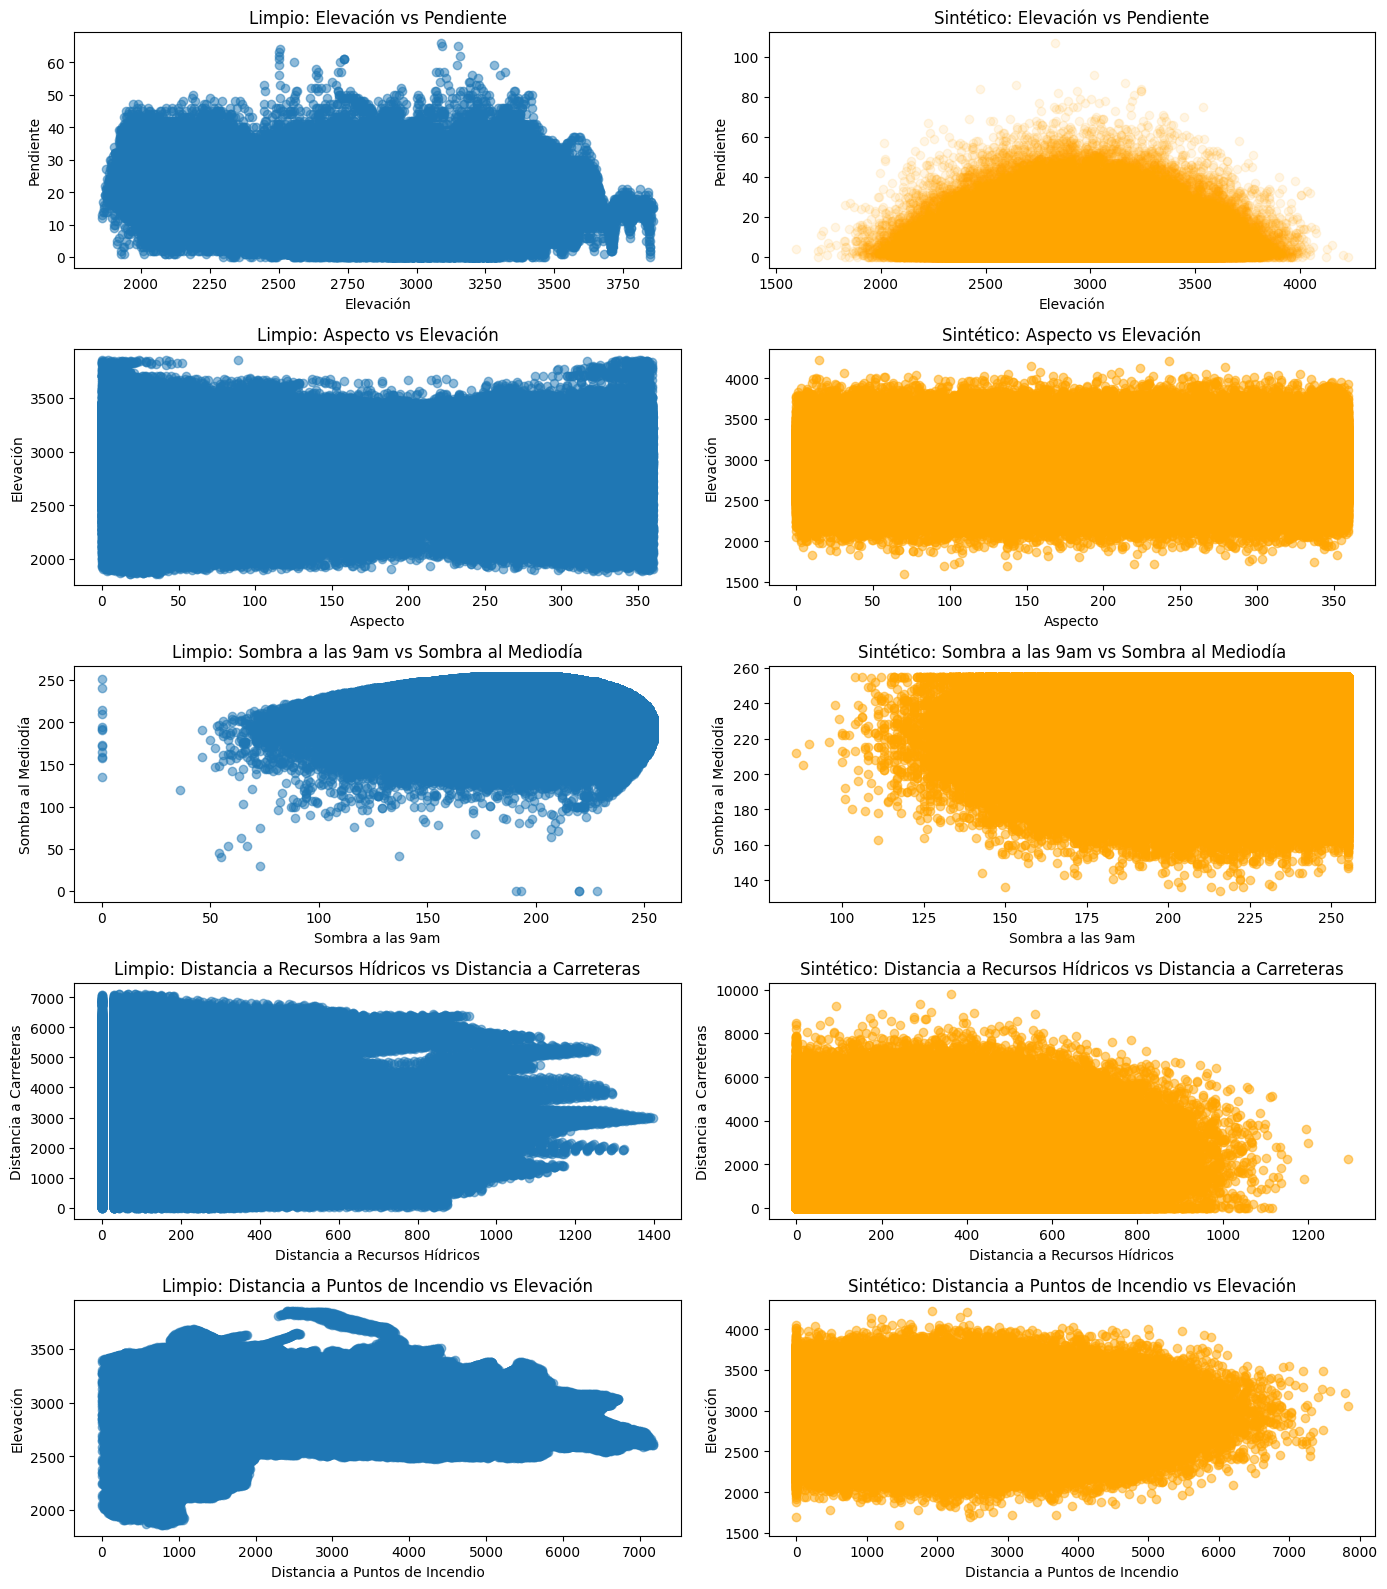

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datasets 'limpio.csv' y 'limpio_sintetico.csv'
df_limpio = pd.read_csv('limpio.csv')
df_limpio_sintetico = pd.read_csv('limpio_sintetico.csv')

# Crear múltiples gráficos para comparar entre el dataset limpio y el sintético generado
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 16))

# Gráfico 1: Elevación vs Pendiente
axes[0, 0].scatter(df_limpio['Elevation'], df_limpio['Slope'], alpha=0.5, label='Dataset Limpio')
axes[0, 0].set_title('Limpio: Elevación vs Pendiente')
axes[0, 0].set_xlabel('Elevación')
axes[0, 0].set_ylabel('Pendiente')

axes[0, 1].scatter(df_limpio_sintetico['Elevation'], df_limpio_sintetico['Slope'], alpha=0.1, color='orange', label='Dataset Sintético')
axes[0, 1].set_title('Sintético: Elevación vs Pendiente')
axes[0, 1].set_xlabel('Elevación')
axes[0, 1].set_ylabel('Pendiente')

# Gráfico 2: Aspecto vs Elevación
axes[1, 0].scatter(df_limpio['Aspect'], df_limpio['Elevation'], alpha=0.5, label='Dataset Limpio')
axes[1, 0].set_title('Limpio: Aspecto vs Elevación')
axes[1, 0].set_xlabel('Aspecto')
axes[1, 0].set_ylabel('Elevación')

axes[1, 1].scatter(df_limpio_sintetico['Aspect'], df_limpio_sintetico['Elevation'], alpha=0.5, color='orange', label='Dataset Sintético')
axes[1, 1].set_title('Sintético: Aspecto vs Elevación')
axes[1, 1].set_xlabel('Aspecto')
axes[1, 1].set_ylabel('Elevación')

# Gráfico 3: Sombra a las 9am vs Sombra al Mediodía
axes[2, 0].scatter(df_limpio['Hillshade_9am'], df_limpio['Hillshade_Noon'], alpha=0.5, label='Dataset Limpio')
axes[2, 0].set_title('Limpio: Sombra a las 9am vs Sombra al Mediodía')
axes[2, 0].set_xlabel('Sombra a las 9am')
axes[2, 0].set_ylabel('Sombra al Mediodía')

axes[2, 1].scatter(df_limpio_sintetico['Hillshade_9am'], df_limpio_sintetico['Hillshade_Noon'], alpha=0.5, color='orange', label='Dataset Sintético')
axes[2, 1].set_title('Sintético: Sombra a las 9am vs Sombra al Mediodía')
axes[2, 1].set_xlabel('Sombra a las 9am')
axes[2, 1].set_ylabel('Sombra al Mediodía')

# Gráfico 4: Distancia a Recursos Hídricos vs Distancia a Carreteras
axes[3, 0].scatter(df_limpio['Horizontal_Distance_To_Hydrology'], df_limpio['Horizontal_Distance_To_Roadways'], alpha=0.5, label='Dataset Limpio')
axes[3, 0].set_title('Limpio: Distancia a Recursos Hídricos vs Distancia a Carreteras')
axes[3, 0].set_xlabel('Distancia a Recursos Hídricos')
axes[3, 0].set_ylabel('Distancia a Carreteras')

axes[3, 1].scatter(df_limpio_sintetico['Horizontal_Distance_To_Hydrology'], df_limpio_sintetico['Horizontal_Distance_To_Roadways'], alpha=0.5, color='orange', label='Dataset Sintético')
axes[3, 1].set_title('Sintético: Distancia a Recursos Hídricos vs Distancia a Carreteras')
axes[3, 1].set_xlabel('Distancia a Recursos Hídricos')
axes[3, 1].set_ylabel('Distancia a Carreteras')

# Gráfico 5: Distancia a Puntos de Incendio vs Elevación
axes[4, 0].scatter(df_limpio['Horizontal_Distance_To_Fire_Points'], df_limpio['Elevation'], alpha=0.5, label='Dataset Limpio')
axes[4, 0].set_title('Limpio: Distancia a Puntos de Incendio vs Elevación')
axes[4, 0].set_xlabel('Distancia a Puntos de Incendio')
axes[4, 0].set_ylabel('Elevación')

axes[4, 1].scatter(df_limpio_sintetico['Horizontal_Distance_To_Fire_Points'], df_limpio_sintetico['Elevation'], alpha=0.5, color='orange', label='Dataset Sintético')
axes[4, 1].set_title('Sintético: Distancia a Puntos de Incendio vs Elevación')
axes[4, 1].set_xlabel('Distancia a Puntos de Incendio')
axes[4, 1].set_ylabel('Elevación')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


## 4. Limpieza
### 4.1 Combinar los Datasets Limpios

En este paso, combinamos los dos datasets, el *limpio.csv* y el *limpio_sintetico.csv*, en un solo dataset llamado *dataset_combinado.csv*. Esto nos permite consolidar los datos reales y sintéticos en un solo archivo para facilitar futuros análisis.

In [78]:
# Cargar los datasets limpios
df_limpio = pd.read_csv('limpio.csv')
df_limpio_sintetico = pd.read_csv('limpio_sintetico.csv')

# Combinar los dos datasets
df_combined = pd.concat([df_limpio, df_limpio_sintetico], ignore_index=True)

# Guardar el dataset combinado
df_combined.to_csv('dataset_combinado.csv', index=False)

print("Los datasets han sido combinados exitosamente. Guardado como 'dataset_combinado.csv'.")


Los datasets han sido combinados exitosamente. Guardado como 'dataset_combinado.csv'.


### 4.2 Preparación del Dataset para la Regresión

En este paso, nos enfocamos en la limpieza y transformación de las variables del dataset combinado para prepararlo de cara a un análisis de regresión.

#### Paso 1: Transformar Variables Categóricas en Numéricas
Primero, convertimos las variables categóricas a valores numéricos. Esto es necesario porque los algoritmos de machine learning no pueden trabajar con datos categóricos directamente. Utilizamos un codificador (`LabelEncoder`) para transformar la columna `Wilderness_Area_Name` en valores numéricos. También nos aseguramos de que las columnas booleanas como `beneficios_por_agua` y `Far_From_Road` se conviertan en valores binarios (0 y 1).

#### Paso 2: Manejo de Valores Faltantes
Revisamos si existen valores faltantes en el dataset. En este caso, optamos por eliminar las filas con valores faltantes usando la función `dropna()`. Este paso es importante para asegurar que no haya datos incompletos que puedan afectar el análisis o el entrenamiento de los modelos.

#### Paso 3: Normalización de las Variables Numéricas
Normalizamos las variables numéricas utilizando `StandardScaler`, lo que transforma los valores para que tengan una media de 0 y una desviación estándar de 1. Este proceso es útil, especialmente en modelos de regresión, para mejorar la estabilidad y el rendimiento del modelo. Las columnas que normalizamos incluyen `Elevation`, `Aspect`, `Slope`, y otras relacionadas con distancias a recursos naturales y puntos de incendio.

$$
z = \frac{x - \mu}{\sigma}
$$



#### Guardar el Dataset Preparado
Finalmente, guardamos el dataset limpio y transformado como `limpio_preparado.csv`. Esto nos permitirá utilizar este dataset en los siguientes pasos del análisis, como la regresión u otros modelos predictivos.


In [79]:
# Cargar el dataset limpio
df_limpio = pd.read_csv('dataset_combinado.csv')

# Paso 1: Convertir las variables categóricas en numéricas (Wilderness_Area_Name, beneficios_por_agua, etc.)
# Convertir 'Wilderness_Area_Name' en valores numéricos usando un mapeo manual
wilderness_mapping = {name: idx for idx, name in enumerate(df_limpio['Wilderness_Area_Name'].unique())}
df_limpio['Wilderness_Area_Name'] = df_limpio['Wilderness_Area_Name'].map(wilderness_mapping)

# Asegurarse de que los valores booleanos sean 0 y 1
df_limpio['beneficios_por_agua'] = df_limpio['beneficios_por_agua'].astype(int)
df_limpio['Far_From_Road'] = df_limpio['Far_From_Road'].astype(int)

# Paso 2: Revisar si hay valores faltantes y eliminarlos
df_limpio = df_limpio.dropna()

# Paso 3: Normalizar las variables numéricas manualmente
columns_to_scale = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                    'Horizontal_Distance_To_Fire_Points']

for column in columns_to_scale:
    mean = df_limpio[column].mean()  # Calcular la media de la columna
    std = df_limpio[column].std()    # Calcular la desviación estándar de la columna
    df_limpio[column] = (df_limpio[column] - mean) / std  # Normalizar la columna


# Guardar el dataset preparado
df_limpio.to_csv('limpio_preparado.csv', index=False)

print("El dataset ha sido limpiado y preparado para la regresión. Guardado como 'limpio_preparado.csv'.")


El dataset ha sido limpiado y preparado para la regresión. Guardado como 'limpio_preparado.csv'.


## 5. Implementación de Regresión Logística para el Dataset

En este punto, nos enfocaremos en implementar la **regresión logística** para predecir las diferentes clases del dataset. A diferencia del enfoque de **One-vs-All**, inicialmente desarrollaremos las fórmulas necesarias para realizar regresión logística de manera separada para cada una de las clases.

La regresión logística es un método estadístico que se utiliza para modelar la probabilidad de que una observación pertenezca a una clase binaria. En nuestro caso, dado que tenemos múltiples clases en el dataset, adaptaremos la fórmula para que pueda predecir la probabilidad de pertenecer a cada clase de manera individual. Más adelante, integraremos el enfoque One-vs-All para tratar el problema multiclase.

El objetivo es desarrollar un modelo que, dado un conjunto de características, nos permita predecir a qué clase pertenece cada muestra del dataset, aplicando las matemáticas de la regresión logística para cada clase de manera independiente antes de escalarlo a una solución más robusta.

En esta sección, comenzaremos por detallar las fórmulas matemáticas y los pasos necesarios para implementar la regresión logística, y luego lo implementaremos en código para su aplicación práctica.


### 5.1 Función Sigmoide

La función **sigmoide** es fundamental en la regresión logística, ya que convierte una entrada lineal en un valor entre 0 y 1, lo que permite modelar probabilidades.
#### Fórmula matemática:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Donde:
- $ z $ es la entrada, que puede ser un escalar, vector o matriz.
- $ \sigma(z) $ es la probabilidad de que la muestra pertenezca a la clase positiva.

Esta función es clave para el cálculo de la probabilidad en la regresión logística, ya que transforma la combinación lineal de las características en un valor interpretable como una probabilidad.


In [80]:
def sigmoid(z):
    """
    Calcula la función sigmoide para el valor dado.

    :param z: Entrada (puede ser un escalar, vector o matriz).
    :return: Valor de la función sigmoide de la entrada.
    """
    return 1 / (1 + np.exp(-z))


### 5.2 Cargar y Preparar Datos

Para realizar la regresión logística, primero necesitamos cargar y preparar nuestros datos. La función `load_and_prepare_data` maneja esta tarea, leyendo los datos desde un archivo CSV y separando las características de la variable objetivo.

#### Descripción de la Función:
La función toma un solo argumento:
- `filepath`: La ruta al archivo CSV desde donde se cargarán los datos.

Este paso es crucial para asegurarse de que los datos están correctamente formatados y listos para ser utilizados en la construcción del modelo de regresión logística.


In [81]:
def load_and_prepare_data(filepath):
    """
    Carga los datos desde un archivo CSV, separando las características y la variable objetivo.

    :param filepath: Ruta al archivo CSV.
    :return: X (características), y (variable objetivo).
    """
    df = pd.read_csv(filepath)
    y = df['Cover_Type'].values  # Extraer la columna objetivo
    X = df.drop('Cover_Type', axis=1).values  # Eliminar la columna objetivo y convertir a array NumPy
    return X, y


### 5.3 Normalizar Características

Antes de proceder con el modelado, es esencial normalizar las características para mejorar la estabilidad y rendimiento del modelo. La función `normalize_features` se encarga de este proceso.

#### Salida:
- La función devuelve `X` normalizado, donde cada característica de la matriz de entrada ha sido escalada para tener una media de cero y una desviación estándar de uno.

#### Fórmula Matemática:
$$
X_{\text{normalized}} = \frac{X - \text{mean}(X)}{\text{std}(X)}
$$
donde:
- $ X $ es la matriz original de características.
- $ \text{mean}(X) $ es el vector de medias de cada característica.
- $ \text{std}(X) $ es el vector de desviaciones estándares de cada característica.

Esta normalización es particularmente útil para técnicas de modelado que son sensibles a la magnitud de las entradas, como la regresión logística.


In [82]:
def normalize_features(X):
    """
    Normaliza las características restando la media y dividiendo por la desviación estándar.

    :param X: Matriz de características.
    :return: Matriz de características normalizadas.
    """
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)


### 5.4 División de Datos en Conjuntos de Entrenamiento y Prueba

Es esencial dividir el dataset en conjuntos de entrenamiento y prueba para validar la efectividad del modelo de regresión logística. Esta función `split_data` realiza la división utilizando una proporción específica.

Este paso garantiza que el modelo se evalúe de manera justa, proporcionando una estimación honesta de su rendimiento en datos no vistos.


In [83]:
def split_data(X, y, ratio=0.8):
    """
    Divide los datos en conjuntos de entrenamiento y prueba.

    :param X: Matriz de características.
    :param y: Variable objetivo.
    :param ratio: Proporción de los datos a utilizar para entrenamiento.
    :return: X_train, X_test, y_train, y_test (conjuntos de datos de entrenamiento y prueba).
    """
    indices = np.random.permutation(len(X))  # Mezcla aleatoriamente los índices
    train_size = int(len(X) * ratio)
    train_idx, test_idx = indices[:train_size], indices[train_size:]  # Índices de entrenamiento y prueba
    X_train, X_test = X[train_idx], X[test_idx]  # Dividir X
    y_train, y_test = y[train_idx], y[test_idx]  # Dividir y
    return X_train, X_test, y_train, y_test


### 5.5 Cálculo del Costo
Esta función calcula el costo (o pérdida) para el modelo de regresión logística. Incluye un término de regularización L2 para penalizar los valores grandes de los pesos y evitar el sobreajuste. El costo mide qué tan lejos están las predicciones del modelo de las verdaderas etiquetas.

$$
\text{Binary Cross-Entropy} = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

$$
\text{Costo} = \frac{1}{m} \sum \left( -y^{(i)} \log(\hat{y}^{(i)}) - (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right)
$$
$$
\text{Regularización L2} = \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2
$$

La función `compute_cost` evalúa la efectividad del modelo utilizando la entropía cruzada binaria como función de pérdida, ajustada por un factor de regularización que ayuda a controlar la complejidad del modelo evitando que los coeficientes se vuelvan demasiado grandes, lo cual podría llevar a que el modelo se ajuste demasiado a los datos de entrenamiento y pierda capacidad de generalización.


In [84]:
def compute_cost(theta, X, y, lambda_=0.1):
    """
    Calcula el costo para la regresión logística con regularización L2.

    :param theta: Parámetros del modelo.
    :param X: Matriz de características.
    :param y: Vector de etiquetas.
    :param lambda_: Factor de regularización.
    :return: Costo del modelo con los parámetros actuales.
    """
    m = len(y)  # Número de ejemplos
    predictions = sigmoid(np.dot(X, theta))  # Predicciones utilizando la función sigmoide
    
    # Binary Cross-Entropy: Error logarítmico
    bce_error = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions)
    
    # Costo sin regularización (BCE)
    cost = 1/m * np.sum(bce_error)
    
    # Regularización L2 (sin incluir θ_0)
    regularization_term = (lambda_ / (2 * m)) * np.sum(theta[1:]**2)
    
    # Costo total con regularización
    total_cost = cost + regularization_term
    return total_cost


### 5.6 Gradiente Descendente
Este bloque implementa el algoritmo de gradiente descendente, que se utiliza para ajustar los pesos del modelo minimizando la función de costo. En cada iteración, el modelo ajusta sus pesos en función de la dirección del gradiente. El término de regularización también se incluye en este cálculo para controlar el sobreajuste.
$$
\theta := \theta - \alpha \left( \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)} + \frac{\lambda}{m} \theta \right)
$$

In [85]:
def gradient_descent(X, y, num_iterations, learning_rate, lambda_=0.1):
    """
    Realiza el algoritmo de gradiente descendente para ajustar los parámetros del modelo.

    :param X: Matriz de características.
    :param y: Vector de etiquetas.
    :param num_iterations: Número de iteraciones para el descenso.
    :param learning_rate: Tasa de aprendizaje (qué tan grandes son los pasos de ajuste).
    :param lambda_: Factor de regularización.
    :return: Parámetros ajustados del modelo (theta) y el historial de costos.
    """
    theta = np.zeros(X.shape[1])  # Inicializar los parámetros theta en 0
    cost_history = []  # Para registrar el costo en cada iteración
    for i in range(num_iterations):
        predictions = sigmoid(X.dot(theta))  # Predicciones actuales
        gradient = (X.T.dot(predictions - y) / len(y)) + (lambda_ * theta / len(y))  # Gradiente con regularización
        theta -= learning_rate * gradient  # Actualizar los parámetros
        cost = compute_cost(theta, X, y, lambda_)  # Calcular el costo actual
        cost_history.append(cost)  # Guardar el costo en el historial
    return theta, cost_history


### 5.7 Entrenamiento de Modelos por Clase
En este bloque, entrenamos un modelo de regresión logística para cada clase de manera separada. Cada modelo intenta distinguir una clase específica de las demás, generando así múltiples modelos binarios, uno para cada clase del dataset.


In [86]:
def train_models(X, y, num_classes):
    """
    Entrena un modelo de regresión logística para cada clase del conjunto de datos.

    :param X: Matriz de características.
    :param y: Vector de etiquetas.
    :param num_classes: Número de clases en el conjunto de datos.
    :return: Diccionario de modelos entrenados y el historial de costos por cada clase.
    """
    thetas = {}  # Diccionario para almacenar los parámetros theta de cada clase
    cost_histories = {}  # Diccionario para almacenar los costos por clase
    for i in range(num_classes):
        print(f"Training model for class {i}")
        y_i = (y == i).astype(int)  # Crear etiquetas binarias para la clase actual
        theta, cost_history = gradient_descent(X, y_i, 10000, 0.01)  # Entrenar el modelo para la clase actual
        thetas[i] = theta  # Guardar los parámetros
        cost_histories[i] = cost_history  # Guardar el historial de costos
    return thetas, cost_histories


### 5.8 Clasificación Individual
Esta función toma una instancia y utiliza el modelo entrenado para una clase específica para predecir si la instancia pertenece a esa clase o no. Esto se hace evaluando la probabilidad de que la instancia pertenezca a la clase y comparándola con un umbral (generalmente 0.5).


In [87]:
def classify_instance(instance, class_type, models):
    """
    Clasifica una instancia utilizando el modelo de regresión logística entrenado para el tipo de clase especificado.

    :param instance: Un array de Numpy que contiene los valores de las características de la instancia a clasificar.
    :param class_type: El tipo de clase (ej. 1 o 2) para el cual se desea realizar la clasificación.
    :param models: Un diccionario de modelos entrenados, donde las claves son los tipos de clase.
    :return: Clasificación binaria (1 si pertenece a la clase, 0 si no pertenece).
    """
    if class_type in models:
        theta = models[class_type]
        prob = sigmoid(np.dot(instance, theta))  # Directamente usar la instancia que ya incluye el término de intercepción
        return 1 if prob >= 0.5 else 0  # Clasificación binaria
    else:
        print("No hay un modelo entrenado para esta clase.")
        return None


### 5.9 Carga, Entrenamiento y Evaluación
Este bloque final carga los datos desde el archivo CSV, normaliza las características y divide los datos en conjuntos de entrenamiento y prueba. Luego, entrena un modelo de regresión logística para cada clase utilizando los datos de entrenamiento. Después de entrenar los modelos, se visualizan los costos a lo largo de las iteraciones. Finalmente, se clasifica una instancia de prueba para verificar si pertenece a una clase específica.


Training model for class 0
Training model for class 1
Training model for class 2
Training model for class 3
Training model for class 4
Training model for class 5
Training model for class 6


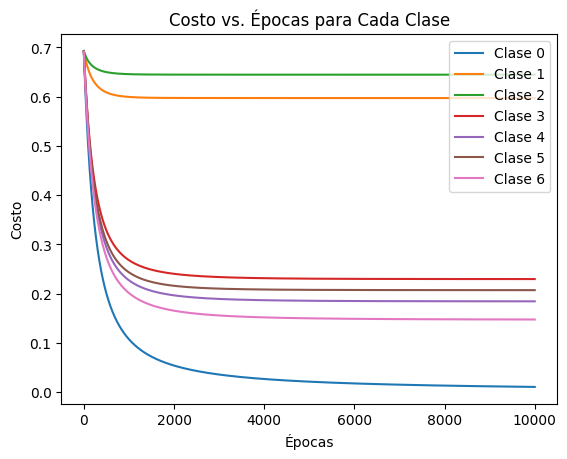

Resultado de la clasificación para la clase {class_to_check}: {"Pertenece" si result == 1 else "No pertenece"}


In [88]:
# Cargar y preparar los datos
X, y = load_and_prepare_data('limpio_preparado.csv')  # Cargar datos desde el archivo CSV
X = normalize_features(X)  # Normalizar las características
X = np.insert(X, 0, 1, axis=1)  # Añadir la intercepción aquí para asegurar consistencia (columna de unos)
X_train, X_test, y_train, y_test = split_data(X, y)  # Dividir los datos en entrenamiento y prueba

# Entrenar modelos
models, cost_histories = train_models(X_train, y_train, len(np.unique(y)))  # Entrenar un modelo para cada clase

# Visualización de los costos por cada clase
for class_index, costs in cost_histories.items():
    plt.plot(costs, label=f'Clase {class_index}')  # Gráfica del costo por clase
plt.title('Costo vs. Épocas para Cada Clase')  # Título de la gráfica
plt.xlabel('Épocas')  # Etiqueta del eje X
plt.ylabel('Costo')  # Etiqueta del eje Y
plt.legend()  # Mostrar la leyenda con las clases
plt.show()  # Mostrar la gráfica

# Clasificación de una instancia de prueba
new_instance = X_test[0]  # Seleccionar una instancia de prueba (ya incluye el término de intercepción)
class_to_check = 1  # Clase que queremos verificar (por ejemplo, la clase 1)
result = classify_instance(new_instance, class_to_check, models)  # Clasificar la instancia
print('Resultado de la clasificación para la clase {class_to_check}: {"Pertenece" si result == 1 else "No pertenece"}')
print(y_test[0])


In [ ]:
# Clasificación de una instancia de prueba
new_instance = X_test[0]  # Seleccionar una instancia de prueba (ya incluye el término de intercepción)
class_to_check = 1  # Clase que queremos verificar (por ejemplo, la clase 1)
result = classify_instance(new_instance, class_to_check, models)  # Clasificar la instancia
print('Resultado de la clasificación para la clase {class_to_check}: {"Pertenece" si result == 1 else "No pertenece"}')
print(y_test[0])

In [89]:
import numpy as np

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función para predecir las clases utilizando los modelos entrenados
def predict(X, models):
    """
    Predice la clase para cada ejemplo en X usando los modelos entrenados en One-vs-All.
    
    :param X: Matriz de características del conjunto de prueba.
    :param models: Diccionario con los parámetros de los modelos entrenados (uno por cada clase).
    :return: Vector de predicciones para cada ejemplo.
    """
    # Crear una lista para almacenar las probabilidades por clase
    probabilities = []
    
    # Iterar sobre cada modelo (clase) y calcular las probabilidades
    for class_label, theta in models.items():
        # Calcular las probabilidades usando la función sigmoide
        prob = sigmoid(np.dot(X, theta))
        probabilities.append(prob)  # Añadir las probabilidades a la lista
    
    # Convertir la lista de probabilidades en una matriz (muestras x clases)
    probabilities = np.array(probabilities).T  # Transponer para obtener la forma correcta
    
    # Seleccionar la clase con la mayor probabilidad
    return np.argmax(probabilities, axis=1)

# Función para calcular la precisión por clase
def precision_per_class(y_true, y_pred, num_classes):
    """
    Calcula la precisión por clase.
    
    :param y_true: Vector de etiquetas verdaderas.
    :param y_pred: Vector de etiquetas predichas.
    :param num_classes: Número de clases en el conjunto de datos.
    :return: Precisión por clase y precisión general.
    """
    precision_by_class = []
    
    for k in range(num_classes):
        # Calcular la precisión para la clase k
        true_positives = np.sum((y_true == k) & (y_pred == k))  # Ejemplos correctamente clasificados para la clase k
        total_class_samples = np.sum(y_true == k)  # Total de ejemplos de la clase k
        precision_class_k = true_positives / total_class_samples if total_class_samples > 0 else 0
        precision_by_class.append(precision_class_k * 100)
    
    return precision_by_class

# Evaluación de la precisión por clase y general en el conjunto de prueba
y_pred = predict(X_test, models)  # Obtener las predicciones
num_classes = len(np.unique(y_test))  # Número de clases en el conjunto de datos

# Calcular la precisión por clase
precision_by_class = precision_per_class(y_test, y_pred, num_classes)

# Imprimir la precisión por clase
for i, precision in enumerate(precision_by_class):
    print(f"Precisión para la clase {i}: {precision:.2f}%")

# Calcular la precisión general
accuracy = np.mean(y_pred == y_test) * 100  # Calcular la precisión general
print(f"Precisión general: {accuracy:.2f}%")


Precisión para la clase 0: 0.00%
Precisión para la clase 1: 50.63%
Precisión para la clase 2: 74.92%
Precisión para la clase 3: 25.88%
Precisión para la clase 4: 0.00%
Precisión para la clase 5: 0.00%
Precisión para la clase 6: 0.00%
Precisión general: 48.87%


## 6. Implementación y Entrenamiento del Modelo One-vs-All

En este último paso, aplicaremos el enfoque One-vs-All para extender nuestra regresión logística a un escenario multiclase. Este método nos permite construir un modelo de clasificación que puede distinguir entre varias clases utilizando varios modelos de regresión logística binaria.

### 6.1 Descripción del Modelo One-vs-All

El enfoque One-vs-All, también conocido como One-vs-Rest, involucra entrenar un modelo de regresión logística por cada clase del dataset. Cada modelo se entrena para distinguir una clase en particular de todas las otras clases combinadas, tratando el problema multiclase como múltiples problemas de clasificación binaria.


### 6.2 Función Sigmoide

En el contexto de la regresión logística One-vs-All, la función **sigmoide** juega un papel crucial al convertir las entradas lineales ponderadas en probabilidades que oscilan entre 0 y 1.

#### Descripción de la Función Sigmoide:
La función sigmoide se define como:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

#### Importancia en One-vs-All:
- **Probabilidad de Pertenencia**: Para cada modelo correspondiente a una clase, esta función estima la probabilidad de que una observación pertenezca a esa clase específica.
- **Cálculo de `z`**: En el contexto de One-vs-All, `z` representa la suma ponderada de las características de entrada, \( z = w^T x + b \), donde \( w \) es el vector de pesos y \( b \) es el término de sesgo asociado a cada clasificador binario del enfoque One-vs-All.

Esta función es esencial para la transformación de las salidas del modelo lineal en un formato adecuado para la clasificación binaria dentro del enfoque multiclase de One-vs-All.


In [1]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### 6.3 Función de Costo con Regularización L2

La función de costo es crucial para medir qué tan bien el modelo de regresión logística se ajusta a los datos durante el entrenamiento, incorporando también una penalización para la complejidad del modelo mediante regularización L2.

#### Descripción de la Función de Costo:
La función `compute_cost` evalúa el costo de un conjunto de predicciones generadas por el modelo, aplicando regularización L2 para controlar el sobreajuste.

#### Fórmula de la Función de Costo:
$$
J(\theta) = -\frac{1}{m} \left[ \sum_{i=1}^m \left( y^{(i)} \log(\sigma(z^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(z^{(i)})) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2
$$

donde:
- $\sigma(z^{(i)})$ es la probabilidad predicha por la función sigmoide para la i-ésima observación.
- $z^{(i)} = X^{(i)} \cdot \theta$ es la entrada lineal a la función sigmoide.
- $y^{(i)}$ es la etiqueta real de la i-ésima observación.
- $\lambda$ es el parámetro de regularización que controla la magnitud de la penalización aplicada a los coeficientes.
- $m$ es el número total de observaciones.
- $n$ es el número de características (excluyendo el término de sesgo).


In [2]:
def compute_cost(theta, X, y, lambda_=0.1):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    epsilon = 1e-5  # Para evitar log(0)
    cost = -(1/m) * (np.dot(y, np.log(predictions + epsilon)) + np.dot((1 - y), np.log(1 - predictions + epsilon)))
    reg_cost = cost + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))  # Regularización L2 (excepto para theta[0])
    return reg_cost

### 6.4 Descenso por Gradiente con Regularización L2

El **descenso por gradiente** es un método iterativo utilizado para optimizar los parámetros del modelo minimizando la función de costo. En este caso, aplicamos el descenso por gradiente con regularización L2, que penaliza los grandes valores de los parámetros para evitar el sobreajuste.

#### Proceso:
1. **Predicciones**:
   Durante cada iteración del descenso por gradiente, primero se calculan las predicciones utilizando la función sigmoide:
   $$
   \hat{y} = \sigma(X \cdot \theta)
   $$
   Donde:
   - $\hat{y}$ son las probabilidades predichas.
   - $X$ es la matriz de características.
   - $\theta$ es el vector de parámetros del modelo.

2. **Cálculo del Error**:
   El error entre las predicciones y las etiquetas reales se calcula como:
   $$
   \text{error} = \hat{y} - y
   $$

3. **Cálculo del Gradiente**:
   El gradiente de la función de costo, que indica en qué dirección deben ajustarse los parámetros, se calcula como:
   $$
   \nabla_{\theta} J(\theta) = \frac{1}{m} \cdot (X^T \cdot (\hat{y} - y))
   $$
   Donde:
   - $X^T$ es la transpuesta de la matriz de características.
   - $m$ es el número de muestras.
   
   **Regularización L2**:
   Para evitar el sobreajuste, se aplica regularización L2 a los parámetros $\theta$, excepto al término de sesgo ($\theta_0$):
   $$
   \nabla_{\theta_j} J(\theta) += \frac{\lambda}{m} \cdot \theta_j \quad \text{para} \quad j \geq 1
   $$

4. **Actualización de los Parámetros**:
   Después de calcular el gradiente, los parámetros se actualizan de acuerdo con la tasa de aprendizaje $\alpha$:
   $$
   \theta = \theta - \alpha \cdot \nabla_{\theta} J(\theta)
   $$

5. **Cálculo del Costo**:
   En cada iteración, después de actualizar los parámetros, se calcula el costo utilizando la función `compute_cost`,


In [3]:
def gradient_descent(X, y, theta, alpha, num_epochs, lambda_=0.1):
    m = len(y)
    cost_history = []
    for epoch in range(num_epochs):
        predictions = sigmoid(np.dot(X, theta))
        error = predictions - y
        gradient = (1/m) * np.dot(X.T, error)  # Gradiente básico sin regularización en theta[0]
        gradient[1:] += (lambda_ / m) * theta[1:]  # Regularización solo para theta[1:]
        theta -= alpha * gradient
        cost = compute_cost(theta, X, y, lambda_)
        cost_history.append(cost)
    return theta, cost_history


### 6.5 Implementación de One-vs-All

El enfoque **One-vs-All** entrena múltiples clasificadores binarios, uno por cada clase, para manejar problemas de clasificación multiclase. La función `one_vs_all` entrena un modelo de regresión logística para cada clase.

#### Proceso:
1. **Inicialización**:
   - Se inicializa una matriz `all_theta` para almacenar los parámetros de cada clase.
   - Se crea una lista `all_costs` para registrar la historia del costo durante el entrenamiento de cada clase.

2. **Entrenamiento por Clase**:
   Para cada clase:
   - Se inicializa un vector de parámetros `theta` en ceros.
   - Se convierte el vector de etiquetas $y$ en un vector binario $y_i$, donde la clase actual es 1 y las demás son 0.
   - Se aplica la función `gradient_descent` para entrenar el modelo y optimizar los parámetros.
   - Los parámetros resultantes se almacenan en `all_theta`.

3. **Salida**:
   - Devuelve `all_theta` con los parámetros entrenados para cada clase.
   - Devuelve `all_costs` con la historia de costos para cada clase.

Este enfoque permite clasificar muestras en múltiples clases usando regresión logística binaria para cada clase.


In [4]:
def one_vs_all(X, y, num_classes, alpha=0.01, num_epochs=1000, lambda_=0.1):
    m, n = X.shape
    all_theta = np.zeros((num_classes, n))
    all_costs = []

    for i in range(num_classes):
        print(f"Entrenando el modelo para la clase {i}...")
        theta = np.zeros(n)  # Inicializamos theta en ceros para cada clase
        y_i = np.where(y == i, 1, 0)  # Crear un vector binario para la clase actual
        theta, cost_history = gradient_descent(X, y_i, theta, alpha, num_epochs, lambda_)
        all_theta[i, :] = theta
        all_costs.append(cost_history)
    
    return all_theta, all_costs


### 6.6 Predicción con One-vs-All

La función `predict_one_vs_all` realiza predicciones para un problema multiclase utilizando los parámetros entrenados por el enfoque One-vs-All.

#### Proceso:
1. **Cálculo de Probabilidades**:
   - Calcula las probabilidades predichas para cada clase aplicando la función sigmoide:
   $$
   \hat{y} = \sigma(X \cdot \theta^T)
   $$
   Donde:
   - $X$ es la matriz de características.
   - $\theta$ son los parámetros entrenados para cada clase.

2. **Selección de la Clase**:
   - Se utiliza `argmax` para seleccionar la clase con la mayor probabilidad predicha:
   $$
   \text{Clase predicha} = \text{argmax}(\hat{y})
   $$
   Esto devuelve el índice de la clase con la mayor probabilidad.

#### Salida:
- Devuelve las clases predichas para cada muestra, donde la clase con la mayor probabilidad es la predicción final.

Esta función permite clasificar muestras en una de las múltiples clases usando los modelos entrenados con One-vs-All.


In [6]:
def predict_one_vs_all(X, all_theta):
    probabilities = sigmoid(np.dot(X, all_theta.T))
    return np.argmax(probabilities, axis=1)


### 6.7 Cargar y Preparar los Datos

In [8]:
def plot_cost_history(all_costs, num_epochs):
    for i, cost_history in enumerate(all_costs):
        plt.plot(range(num_epochs), cost_history, label=f'Clase {i}')
    plt.title('Costo vs Épocas para Cada Clase')
    plt.xlabel('Épocas')
    plt.ylabel('Costo')
    plt.legend()
    plt.show()

In [9]:
def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    y = df['Cover_Type'].values
    X = df.drop('Cover_Type', axis=1).values
    return X, y


### 6.8 Normalizar las Características

La función `normalize_features` normaliza las características de la matriz `X` para que tengan una media de 0 y una desviación estándar de 1.

#### Proceso:
- Resta la media y divide entre la desviación estándar para cada columna en `X`.

#### Salida:
- Devuelve la matriz de características normalizadas.


In [10]:
def normalize_features(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

### 6.9 Dividir los Datos en Entrenamiento y Prueba

La función `split_data` divide el conjunto de datos en entrenamiento y prueba según la proporción especificada.


In [11]:
def split_data(X, y, ratio=0.8):
    indices = np.random.permutation(len(X))
    train_size = int(len(X) * ratio)
    train_idx, test_idx = indices[:train_size], indices[train_size:]
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    return X_train, X_test, y_train, y_test

Entrenando el modelo para la clase 0...
Entrenando el modelo para la clase 1...
Entrenando el modelo para la clase 2...
Entrenando el modelo para la clase 3...
Entrenando el modelo para la clase 4...
Entrenando el modelo para la clase 5...
Entrenando el modelo para la clase 6...


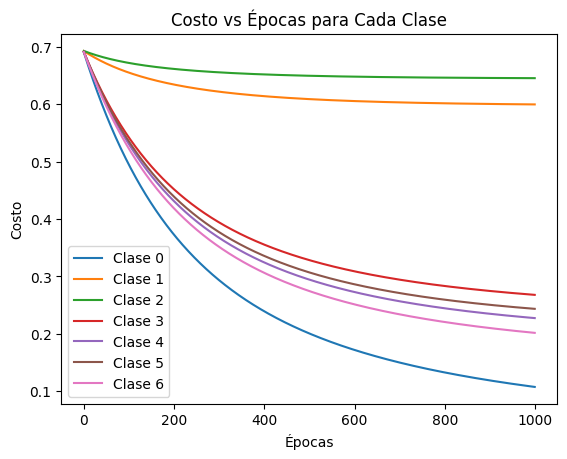

Precisión del modelo One-vs-All en el conjunto de prueba: 48.46%


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Cargar datos
X, y = load_and_prepare_data('limpio_preparado.csv')
X = normalize_features(X)  # Normalizar las características
X = np.insert(X, 0, 1, axis=1)  # Agregar la columna de intercepción
X_train, X_test, y_train, y_test = split_data(X, y)  # Dividir en entrenamiento y prueba

# Entrenar el modelo One-vs-All
num_classes = len(np.unique(y_train))
alpha = 0.01  # Tasa de aprendizaje
num_epochs = 1000  # Número de épocas
lambda_ = 0.1  # Regularización

all_theta, all_costs = one_vs_all(X_train, y_train, num_classes, alpha, num_epochs, lambda_)

# Visualizar el costo por clases
plot_cost_history(all_costs, num_epochs)

# Predecir y evaluar la precisión en el conjunto de prueba
y_pred = predict_one_vs_all(X_test, all_theta)
accuracy = np.mean(y_pred == y_test) * 100
print(f'Precisión del modelo One-vs-All en el conjunto de prueba: {accuracy:.2f}%')
